In [1]:
from google.colab import files
uploaded = files.upload()

Saving bike-sharing-demand.zip to bike-sharing-demand.zip


In [2]:
!unzip bike-sharing-demand.zip

Archive:  bike-sharing-demand.zip
  inflating: sampleSubmission.csv    
  inflating: test.csv                
  inflating: train.csv               


In [3]:
!pip install autogluon

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 2.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.6/43.6 kB 2.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.6/43.6 kB 2.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 259.5/259.5 kB 9.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
INFO: pip is looking at multiple versions of openxlab to determine which version is compatible with other requirements. This could take a while.
INFO: pip is still looking at multiple versions of openxlab to determine which version is compatible with other requirements. This could take a while.
INFO: This is taking longer than usual. You might need to provide the dependency resolver with stricter constraints to reduce runtime. See https://pip.pypa.io/warnings/backtracking for guidance. If you want to abort this run, press Ctrl + C.
   ━━━━━━━━━━━━━━━

In [4]:
import pandas as pd
from autogluon.tabular import TabularPredictor

In [5]:
import autogluon.core

In [6]:
# Suppress warnings
import warnings
warnings.filterwarnings('ignore')

In [1]:
!pip install -U pip
!pip install -U setuptools wheel
!pip install pydantic==1.10.3
!pip install -U "mxnet<2.0.0" bokeh==2.0.1
!pip install autogluon --no-cache-dir
# Without --no-cache-dir, smaller aws instances may have trouble installing

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 79.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.1/49.1 MB 40.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 151.3 MB/s eta 0:00:00
  DEPRECATION: Building 'bokeh' using the legacy setup.py bdist_wheel mechanism, which will be removed in a future version. pip 25.3 will enforce this behaviour change. A possible replacement is to use the standardized build interface by setting the `--use-pep517` option, (possibly combined with `--no-build-isolation`), or adding a `pyproject.toml` file to the source tree of 'bokeh'. Discussion can be found at https://github.com/pypa/pip/issues/6334
  Created wheel for bokeh: filename=bokeh-2.0.1-py3-none-any.whl size=9080109 sha256=e34337f3e40052a4f5a11b30d0529c085c1d18e73121e5047056706fffb4e949
  Stored in directory: /root/.cache/pip/wheels/0e/c4/ce/fecee9e6406e166eaba4e09b1acd2096a84ffef5275ea90806
Successful

In [2]:
import pandas as pd
from autogluon.tabular import TabularPredictor
from sklearn.model_selection import train_test_split

In [3]:
# Load the training and test datasets
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')
sample_submission = pd.read_csv('sampleSubmission.csv')

# Display the first few rows of the training data
print(train_data.head())

              datetime  season  holiday  workingday  weather  temp   atemp  \
0  2011-01-01 00:00:00       1        0           0        1  9.84  14.395   
1  2011-01-01 01:00:00       1        0           0        1  9.02  13.635   
2  2011-01-01 02:00:00       1        0           0        1  9.02  13.635   
3  2011-01-01 03:00:00       1        0           0        1  9.84  14.395   
4  2011-01-01 04:00:00       1        0           0        1  9.84  14.395   

   humidity  windspeed  casual  registered  count  
0        81        0.0       3          13     16  
1        80        0.0       8          32     40  
2        80        0.0       5          27     32  
3        75        0.0       3          10     13  
4        75        0.0       0           1      1  


In [4]:
# Create the train dataset in pandas by reading the csv
# Set the parsing of the datetime column so you can use some of the `dt` features in pandas later
train = pd.read_csv("train.csv",parse_dates=["datetime"])

In [5]:
# Simple output of the train dataset to view some of the min/max/varition of the dataset features.
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [6]:
# Train dataset summary
train.describe()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2011-12-27 05:56:22.399411968,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
min,2011-01-01 00:00:00,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2011-07-02 07:15:00,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,2012-01-01 20:30:00,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,2012-07-01 12:45:00,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,2012-12-19 23:00:00,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000
std,NaN,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454


In [7]:
# Information regarding datatypes of variables within the train
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  int64         
 2   holiday     10886 non-null  int64         
 3   workingday  10886 non-null  int64         
 4   weather     10886 non-null  int64         
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   casual      10886 non-null  int64         
 10  registered  10886 non-null  int64         
 11  count       10886 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(8)
memory usage: 1020.7 KB


In [8]:
# Check for null values in train data
train.isnull().sum()

,0
datetime,0
season,0
holiday,0
workingday,0
weather,0
temp,0
atemp,0
humidity,0
windspeed,0
casual,0


In [9]:
# Create the test pandas dataframe in pandas by reading the csv, remember to parse the datetime!
test = pd.read_csv("test.csv",parse_dates=["datetime"])
test.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014


In [10]:
# Check for null values in test data
test.isnull().sum()

,0
datetime,0
season,0
holiday,0
workingday,0
weather,0
temp,0
atemp,0
humidity,0
windspeed,0


In [11]:
# Shape of train and test datasets
print("Train Dataset Shape : ", train.shape)
print("Test Dataset Shape  : ", test.shape)

Train Dataset Shape :  (10886, 12)
Test Dataset Shape  :  (6493, 9)


In [12]:
# Same thing as train and test dataset
submission = pd.read_csv("sampleSubmission.csv",parse_dates=["datetime"])
submission.head()

,datetime,count
0,2011-01-20 00:00:00,0
1,2011-01-20 01:00:00,0
2,2011-01-20 02:00:00,0
3,2011-01-20 03:00:00,0
4,2011-01-20 04:00:00,0


In [13]:
# Checking all the features and target variable in the dataset
print("Columns in Train Dataset:\n", train.columns)
print("\nColumns in Test Dataset:\n", test.columns)

Columns in Train Dataset:
 Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count'],
      dtype='object')

Columns in Test Dataset:
 Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed'],
      dtype='object')


In [14]:
# Variables not present in test dataset
print("Variables that are not present in the test dataset: ")
list(set(train.columns).difference(set(test.columns)))

Variables that are not present in the test dataset: 


['casual', 'registered', 'count']

Data Fields (Data Dictionary)
datetime - hourly date + timestamp
season - 1 = spring, 2 = summer, 3 = fall, 4 = winter
holiday - whether the day is considered a holiday
workingday - whether the day is neither a weekend nor holiday
weather -

1: Clear, Few clouds, Partly cloudy, Partly cloudy
2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
temp - temperature in Celsius
atemp - "feels like" temperature in Celsius
humidity - relative humidity
windspeed - wind speed
casual - number of non-registered user rentals initiated (ignore, since absent in test data)
registered - number of registered user rentals initiated (ignore, since absent in test data)
count - number of total rentals

Step 3: Train a model using AutoGluon’s Tabular Prediction
Requirements:

We are prediting count, so it is the label we are setting.
Ignore casual and registered columns as they are also not present in the test dataset.
Use the root_mean_squared_error as the metric to use for evaluation.
Set a time limit of 10 minutes (600 seconds).
Use the preset best_quality to focus on creating the best model.

In [15]:
# Requirements: For AutoGluon's Tabular Predictions
eval_metric = 'root_mean_squared_error'
label = 'count'
ignored_columns = ["casual", "registered"]   # Ignored columns while training
train_data = train                           # 'casual' and 'registered' columns are already dropped/ignored
time_limit = 600                             # 10 minutes -> 60*10 = 600 seconds
presets = "best_quality"                     # auto_stack=True

In [16]:
predictor = TabularPredictor(label=label,
                             problem_type= 'regression',
                             eval_metric=eval_metric,
                             learner_kwargs={'ignored_columns': ignored_columns}).fit(
                                                                           train_data = train_data,
                                                                           time_limit=time_limit,
                                                                           presets=presets)

No path specified. Models will be saved in: "AutogluonModels/ag-20250608_075033"
Verbosity: 2 (Standard Logging)
=================== System Info ===================
AutoGluon Version:  1.3.1
Python Version:     3.11.13
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP PREEMPT_DYNAMIC Sun Mar 30 16:01:29 UTC 2025
CPU Count:          2
Memory Avail:       11.41 GB / 12.67 GB (90.0%)
Disk Space Avail:   64.81 GB / 107.72 GB (60.2%)
Presets specified: ['best_quality']
Setting dynamic_stacking from 'auto' to True. Reason: Enable dynamic_stacking when use_bag_holdout is disabled. (use_bag_holdout=False)
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=1
DyStack is enabled (dynamic_stacking=True). AutoGluon will try to determine whether the input data is affected by stacked overfitting and enable or disable stacking as a consequence.
	This is used to identify the optimal `num_stack_levels` value. Copies of AutoGluon will be

(_ray_fit pid=8093) [1000]	valid_set's rmse: 129.692
(_ray_fit pid=8354) [1000]	valid_set's rmse: 132.725 [repeated 5x across cluster] (Ray deduplicates logs by default. Set RAY_DEDUP_LOGS=0 to disable log deduplication, or see https://docs.ray.io/en/master/ray-observability/user-guides/configure-logging.html#log-deduplication for more options.)
(_ray_fit pid=8422) [1000]	valid_set's rmse: 128.154
(_ray_fit pid=8422) [2000]	valid_set's rmse: 126.702
(_ray_fit pid=8422) [3000]	valid_set's rmse: 126.147
(_ray_fit pid=8422) [4000]	valid_set's rmse: 125.904
(_ray_fit pid=8542) [1000]	valid_set's rmse: 135.845


(_ray_fit pid=8422) 	Ran out of time, early stopping on iteration 6040. Best iteration is:
(_ray_fit pid=8422) 	[6023]	valid_set's rmse: 125.428


(_ray_fit pid=8542) [4000]	valid_set's rmse: 133.013 [repeated 5x across cluster]
(_ray_fit pid=8542) [6000]	valid_set's rmse: 132.628 [repeated 2x across cluster]


(_ray_fit pid=8542) 	Ran out of time, early stopping on iteration 6935. Best iteration is:
(_ray_fit pid=8542) 	[6544]	valid_set's rmse: 132.434


(_ray_fit pid=8719) [1000]	valid_set's rmse: 137.712
(_ray_fit pid=8719) [2000]	valid_set's rmse: 136.347
(_ray_fit pid=8719) [3000]	valid_set's rmse: 135.865
(_ray_fit pid=8719) [4000]	valid_set's rmse: 135.344
(_ray_fit pid=8719) [5000]	valid_set's rmse: 135.358
(_ray_fit pid=8719) [6000]	valid_set's rmse: 135.139


(_ray_fit pid=8719) 	Ran out of time, early stopping on iteration 7136. Best iteration is:
(_ray_fit pid=8719) 	[6258]	valid_set's rmse: 135.071


(_ray_fit pid=8824) [3000]	valid_set's rmse: 138.261 [repeated 4x across cluster]
(_ray_fit pid=8824) [5000]	valid_set's rmse: 137.961 [repeated 2x across cluster]


(_dystack pid=7880) 	-131.9992	 = Validation score   (-root_mean_squared_error)
(_dystack pid=7880) 	105.65s	 = Training   runtime
(_dystack pid=7880) 	18.11s	 = Validation runtime
(_dystack pid=7880) Fitting model: WeightedEnsemble_L2 ... Training model for up to 140.70s of the 21.09s of remaining time.
(_dystack pid=7880) 	Ensemble Weights: {'KNeighborsDist_BAG_L1': 1.0}
(_dystack pid=7880) 	-89.9469	 = Validation score   (-root_mean_squared_error)
(_dystack pid=7880) 	0.01s	 = Training   runtime
(_dystack pid=7880) 	0.0s	 = Validation runtime
(_dystack pid=7880) Fitting 106 L2 models, fit_strategy="sequential" ...
(_dystack pid=7880) Fitting model: LightGBMXT_BAG_L2 ... Training model for up to 21.07s of the 20.75s of remaining time.
(_dystack pid=7880) 	Fitting 8 child models (S1F1 - S1F8) | Fitting with ParallelLocalFoldFittingStrategy (2 workers, per: cpus=1, gpus=0, memory=0.12%)


(_ray_fit pid=9019) [1000]	valid_set's rmse: 70.7934
(_ray_fit pid=9020) [1000]	valid_set's rmse: 71.1318


(_ray_fit pid=9020) 	Ran out of time, early stopping on iteration 1437. Best iteration is:
(_ray_fit pid=9020) 	[1162]	valid_set's rmse: 70.8987


(_ray_fit pid=9163) [1000]	valid_set's rmse: 78.2997


(_ray_fit pid=9163) 	Ran out of time, early stopping on iteration 1334. Best iteration is:
(_ray_fit pid=9163) 	[1283]	valid_set's rmse: 78.048


(_ray_fit pid=9210) [1000]	valid_set's rmse: 73.5702


(_ray_fit pid=9210) 	Ran out of time, early stopping on iteration 1206. Best iteration is:
(_ray_fit pid=9210) 	[1078]	valid_set's rmse: 73.4284


(_ray_fit pid=9323) [1000]	valid_set's rmse: 76.0871
(_ray_fit pid=9369) [1000]	valid_set's rmse: 77.0972


(_ray_fit pid=9369) 	Ran out of time, early stopping on iteration 1238. Best iteration is:
(_ray_fit pid=9369) 	[1228]	valid_set's rmse: 76.9846


(_ray_fit pid=9481) [1000]	valid_set's rmse: 72.5861
(_ray_fit pid=9529) [1000]	valid_set's rmse: 75.6118


(_ray_fit pid=9529) 	Ran out of time, early stopping on iteration 1935. Best iteration is:
(_ray_fit pid=9529) 	[1918]	valid_set's rmse: 75.3298
(_dystack pid=7880) 	-74.2651	 = Validation score   (-root_mean_squared_error)
(_dystack pid=7880) 	57.26s	 = Training   runtime
(_dystack pid=7880) 	2.82s	 = Validation runtime
(_dystack pid=7880) Fitting model: WeightedEnsemble_L3 ... Training model for up to 140.70s of the -42.90s of remaining time.
(_dystack pid=7880) 	Ensemble Weights: {'LightGBMXT_BAG_L2': 0.947, 'KNeighborsDist_BAG_L1': 0.053}
(_dystack pid=7880) 	-74.2138	 = Validation score   (-root_mean_squared_error)
(_dystack pid=7880) 	0.02s	 = Training   runtime
(_dystack pid=7880) 	0.0s	 = Validation runtime
(_dystack pid=7880) AutoGluon training complete, total runtime = 183.75s ... Best model: WeightedEnsemble_L3 | Estimated inference throughput: 57.8 rows/s (1210 batch size)
(_dystack pid=7880) TabularPredictor saved. To load, use: predictor = TabularPredictor.load("/content/

In [17]:
predictor = TabularPredictor.load("AutogluonModels/ag-20250608_075033")

In [18]:
# Leaderboard dataframe
leaderboard_df = pd.DataFrame(predictor.leaderboard(silent=True))
leaderboard_df

,model,score_val,eval_metric,pred_time_val,fit_time,pred_time_val_marginal,fit_time_marginal,stack_level,can_infer,fit_order
0,WeightedEnsemble_L3,-55.041901,root_mean_squared_error,30.143128,379.547902,0.000927,0.040249,3,True,10
1,LightGBM_BAG_L2,-55.086769,root_mean_squared_error,22.275406,288.493090,0.417090,46.303227,2,True,9
2,LightGBMXT_BAG_L2,-60.628208,root_mean_squared_error,29.725111,333.204426,7.866795,91.014563,2,True,8
3,KNeighborsDist_BAG_L1,-84.125061,root_mean_squared_error,0.056538,0.037624,0.056538,0.037624,1,True,2
4,WeightedEnsemble_L2,-84.125061,root_mean_squared_error,0.057482,0.069452,0.000944,0.031829,2,True,7
5,KNeighborsUnif_BAG_L1,-101.546199,root_mean_squared_error,0.069893,0.042275,0.069893,0.042275,1,True,1
6,RandomForestMSE_BAG_L1,-116.548359,root_mean_squared_error,1.138427,23.544871,1.138427,23.544871,1,True,5
7,LightGBM_BAG_L1,-131.054162,root_mean_squared_error,2.156365,62.174646,2.156365,62.174646,1,True,4
8,LightGBMXT_BAG_L1,-131.460909,root_mean_squared_error,18.339293,102.146365,18.339293,102.146365,1,True,3
9,CatBoost_BAG_L1,-132.705742,root_mean_squared_error,0.097800,54.244083,0.097800,54.244083,1,True,6


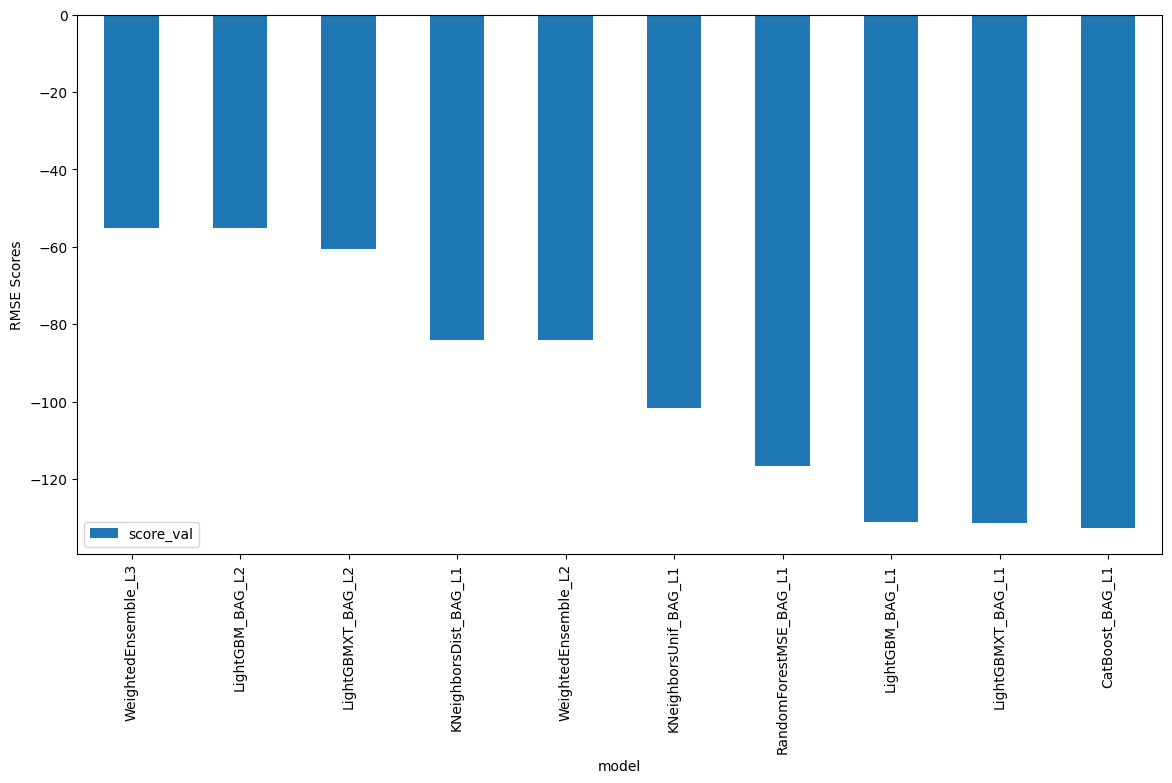

In [20]:
# Output the model's `score_val` in a bar chart to compare performance
import matplotlib.pyplot as plt
leaderboard_df.plot(kind="bar", x="model", y="score_val", figsize=(14, 7))
plt.ylabel("RMSE Scores")
plt.show()

**Create predictions from test dataset**

In [21]:
predictions = predictor.predict(test)
predictions.head()

,count
0,36.525654
1,43.911766
2,48.008373
3,52.877872
4,53.779072


In [22]:
# Describe the `predictions` series to see if there are any negative values
predictions.describe()

,count
count,6493.000000
mean,99.353416
std,89.540413
min,-6.807696
25%,16.400696
50%,64.240921
75%,171.303329
max,369.968506


In [23]:
# How many negative values do we have?

# Rechecking the predictions
negative_pred_count = predictions.apply(lambda x: 1 if x<0 else 0)

pred_pos_count = (negative_pred_count==0).sum()
pred_neg_count = (negative_pred_count==1).sum()

print("Total predictions                :", len(predictions.index))
print("Total positive prediction values :", pred_pos_count)
print("Total negative prediction values :", pred_neg_count)

Total predictions                : 6493
Total positive prediction values : 6488
Total negative prediction values : 5


In [24]:
# Set them to zero
predictions[predictions<0] = 0    # (In case, if negative values exist in the predictions, set them to 0)

# Rechecking, if no predictions are less than 0
negative_pred_count = predictions.apply(lambda x: 1 if x<0 else 0)
pred_neg_count = (negative_pred_count==1).sum()
print(f"No. of negative predictions: {pred_neg_count}")
print("All negative values in the predictions (if any) are set to zero successfully.")

No. of negative predictions: 0
All negative values in the predictions (if any) are set to zero successfully.


In [25]:
submission["count"] = predictions
submission.to_csv("submission.csv", index=False)

In [26]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = "/content/"

In [27]:
!ls

AutogluonModels		 sample_data	       submission.csv  train.csv
bike-sharing-demand.zip  sampleSubmission.csv  test.csv


In [29]:
from google.colab import files
uploaded = files.upload()


Saving kaggle.json to kaggle.json


In [30]:
!kaggle competitions submit -c bike-sharing-demand -f submission.csv -m "first raw submission"

100% 188k/188k [00:00<00:00, 1.09MB/s]
Successfully submitted to Bike Sharing Demand

In [31]:
!chmod 600 /content/kaggle.json

In [32]:
!ls -l /content/kaggle.json

-rw------- 1 root root 74 Jun  8 08:16 /content/kaggle.json


In [33]:
!kaggle competitions submit -c bike-sharing-demand -f submission.csv -m "first raw submission"

100% 188k/188k [00:00<00:00, 1.13MB/s]
Successfully submitted to Bike Sharing Demand

In [34]:
!kaggle competitions submissions -c bike-sharing-demand | tail -n +1 | head -n 3

fileName                     date                        description           status                     publicScore  privateScore  
---------------------------  --------------------------  --------------------  -------------------------  -----------  ------------  
submission.csv               2025-06-08 08:17:42.100000  first raw submission  SubmissionStatus.COMPLETE  1.84252      1.84252       


Initial score:1.85152

Step 4: Exploratory Data Analysis and Creating an additional feature

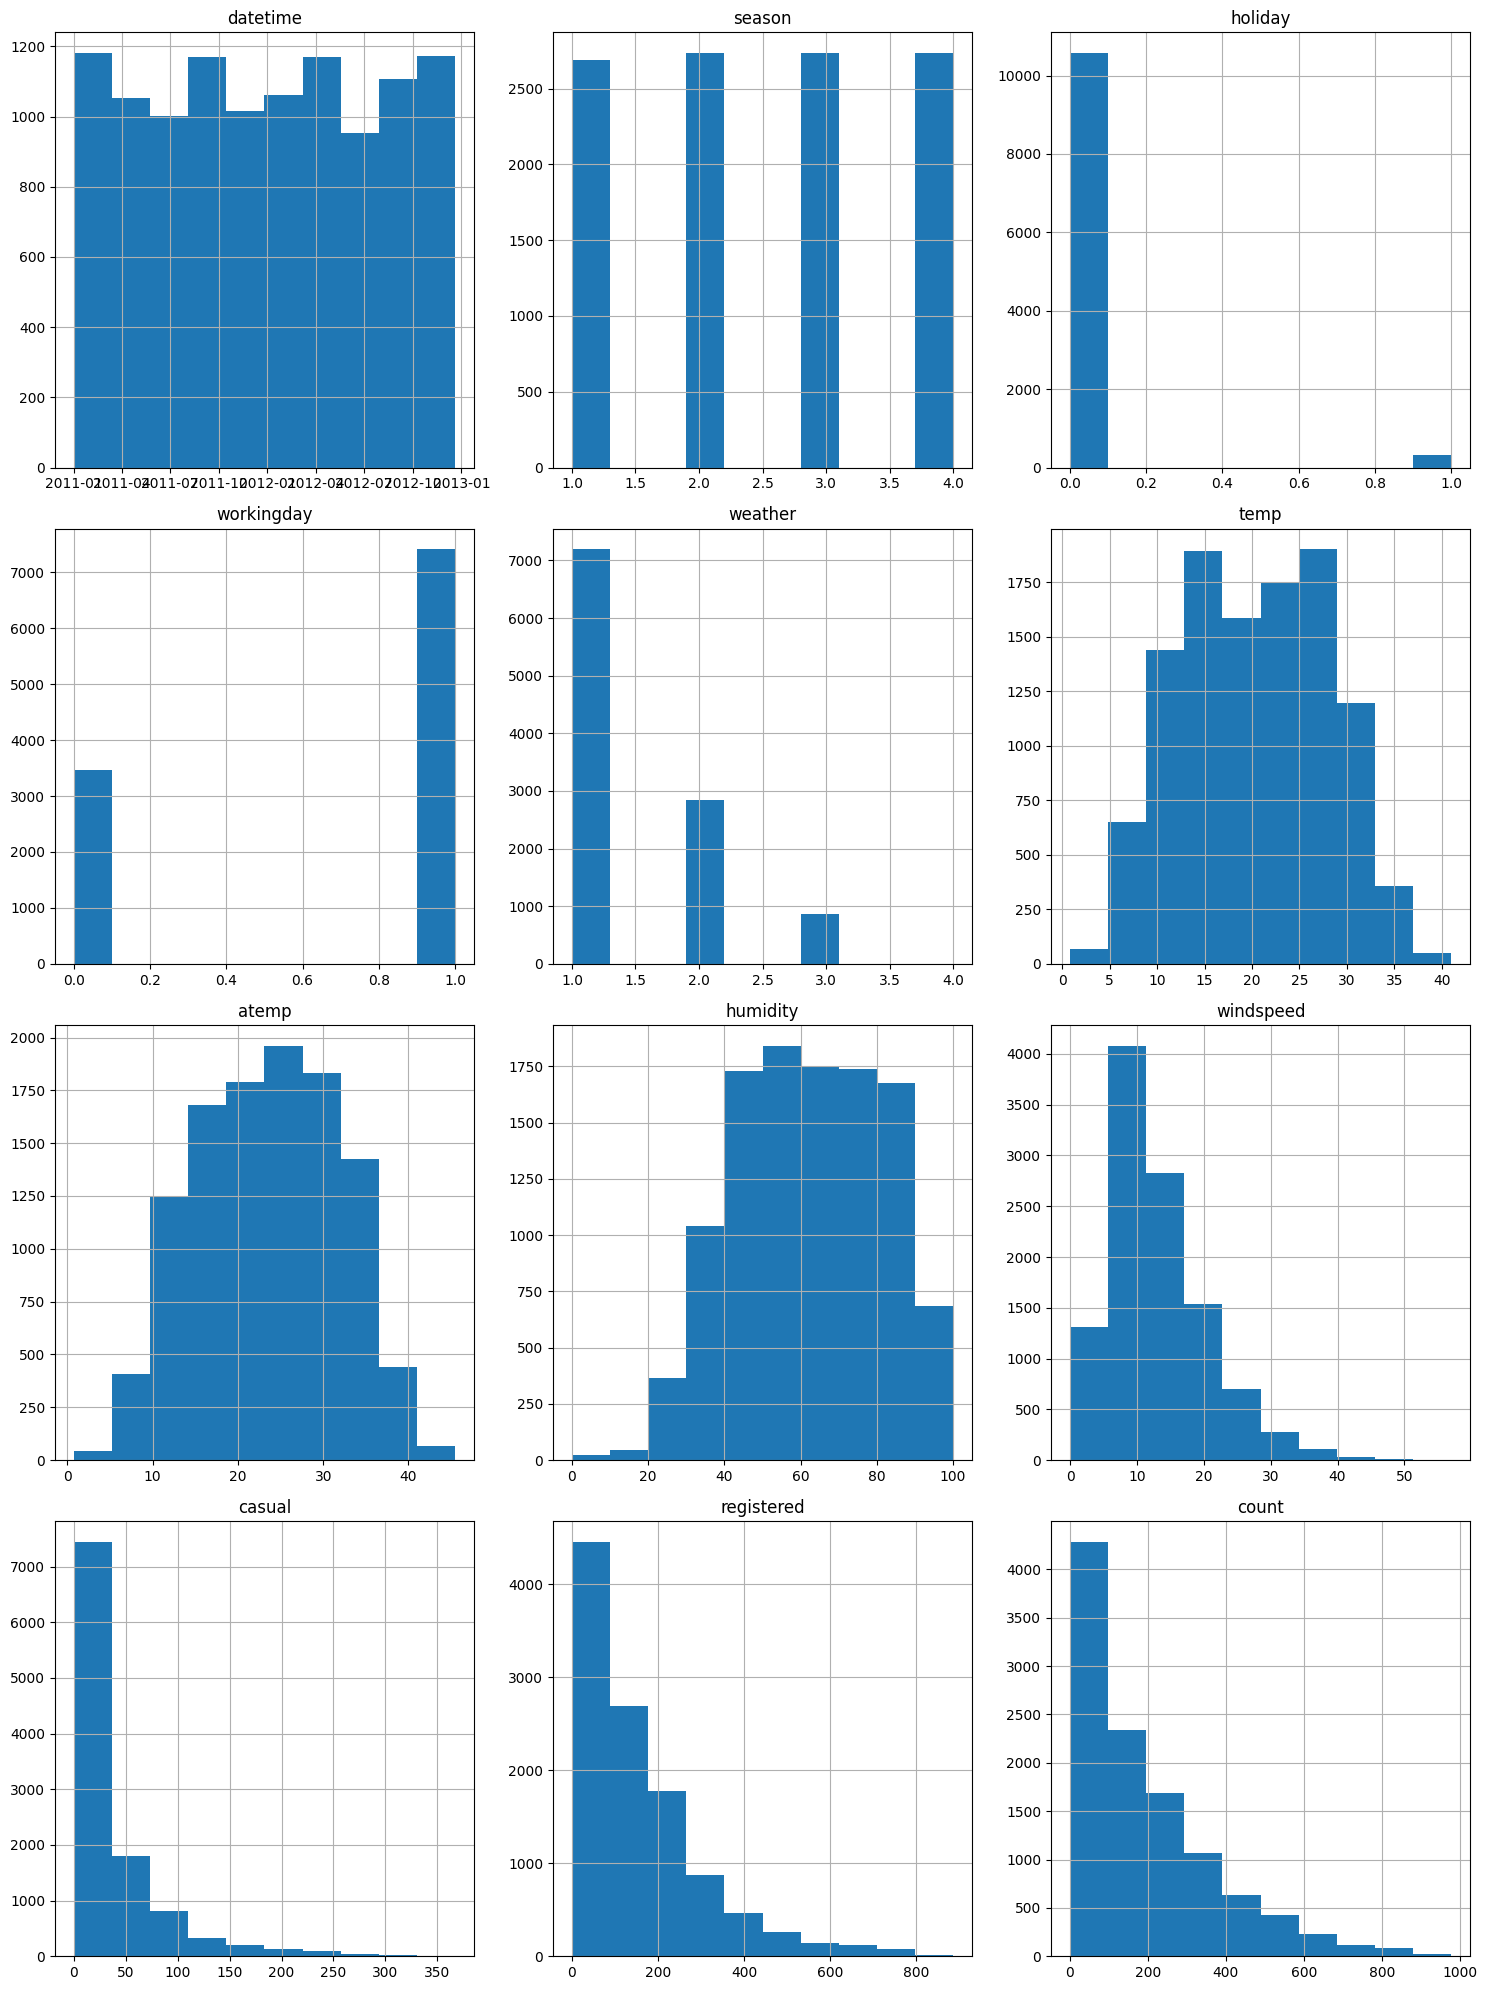

In [35]:
# Create a histogram of all features to show the distribution of each one relative to the data. This is part of the exploritory data analysis
train.hist(figsize=(15,20))  # Note: 'casual' and 'registered' are ignored during training as they are absent in test data

plt.tight_layout()
plt.show()

Observations:

Features like season and weather are categorical variables and it is evident from the above plot.

Bike rental counts for feature season intuitively makes sense as the counts are highest for 0: Spring season and the lowest for 3: Winter season. These counts decrease as seasons change from Spring -> Summer -> Fall -> Winter.

Predictors like holiday and workingday are one-hot encoded columns with values 0 and 1. Highest rental counts are noticed during non-holidays whereas more rental counts are encountered during working days.
datetime histogram illustrates datetime feature, showing randomness as they represent timestamps

Plots of predictor features like temp, atemp, humidity and windspeed depicts normal distribution. windspeed shows a slightly 'positively-skewed distribution'.

casual and registered independent feature histogram plots are ignored as they are invalid for our analysis, since they are absent in the test dataset.

Plot Heatmap using Correlation Matrix

<Figure size 1800x1800 with 0 Axes>

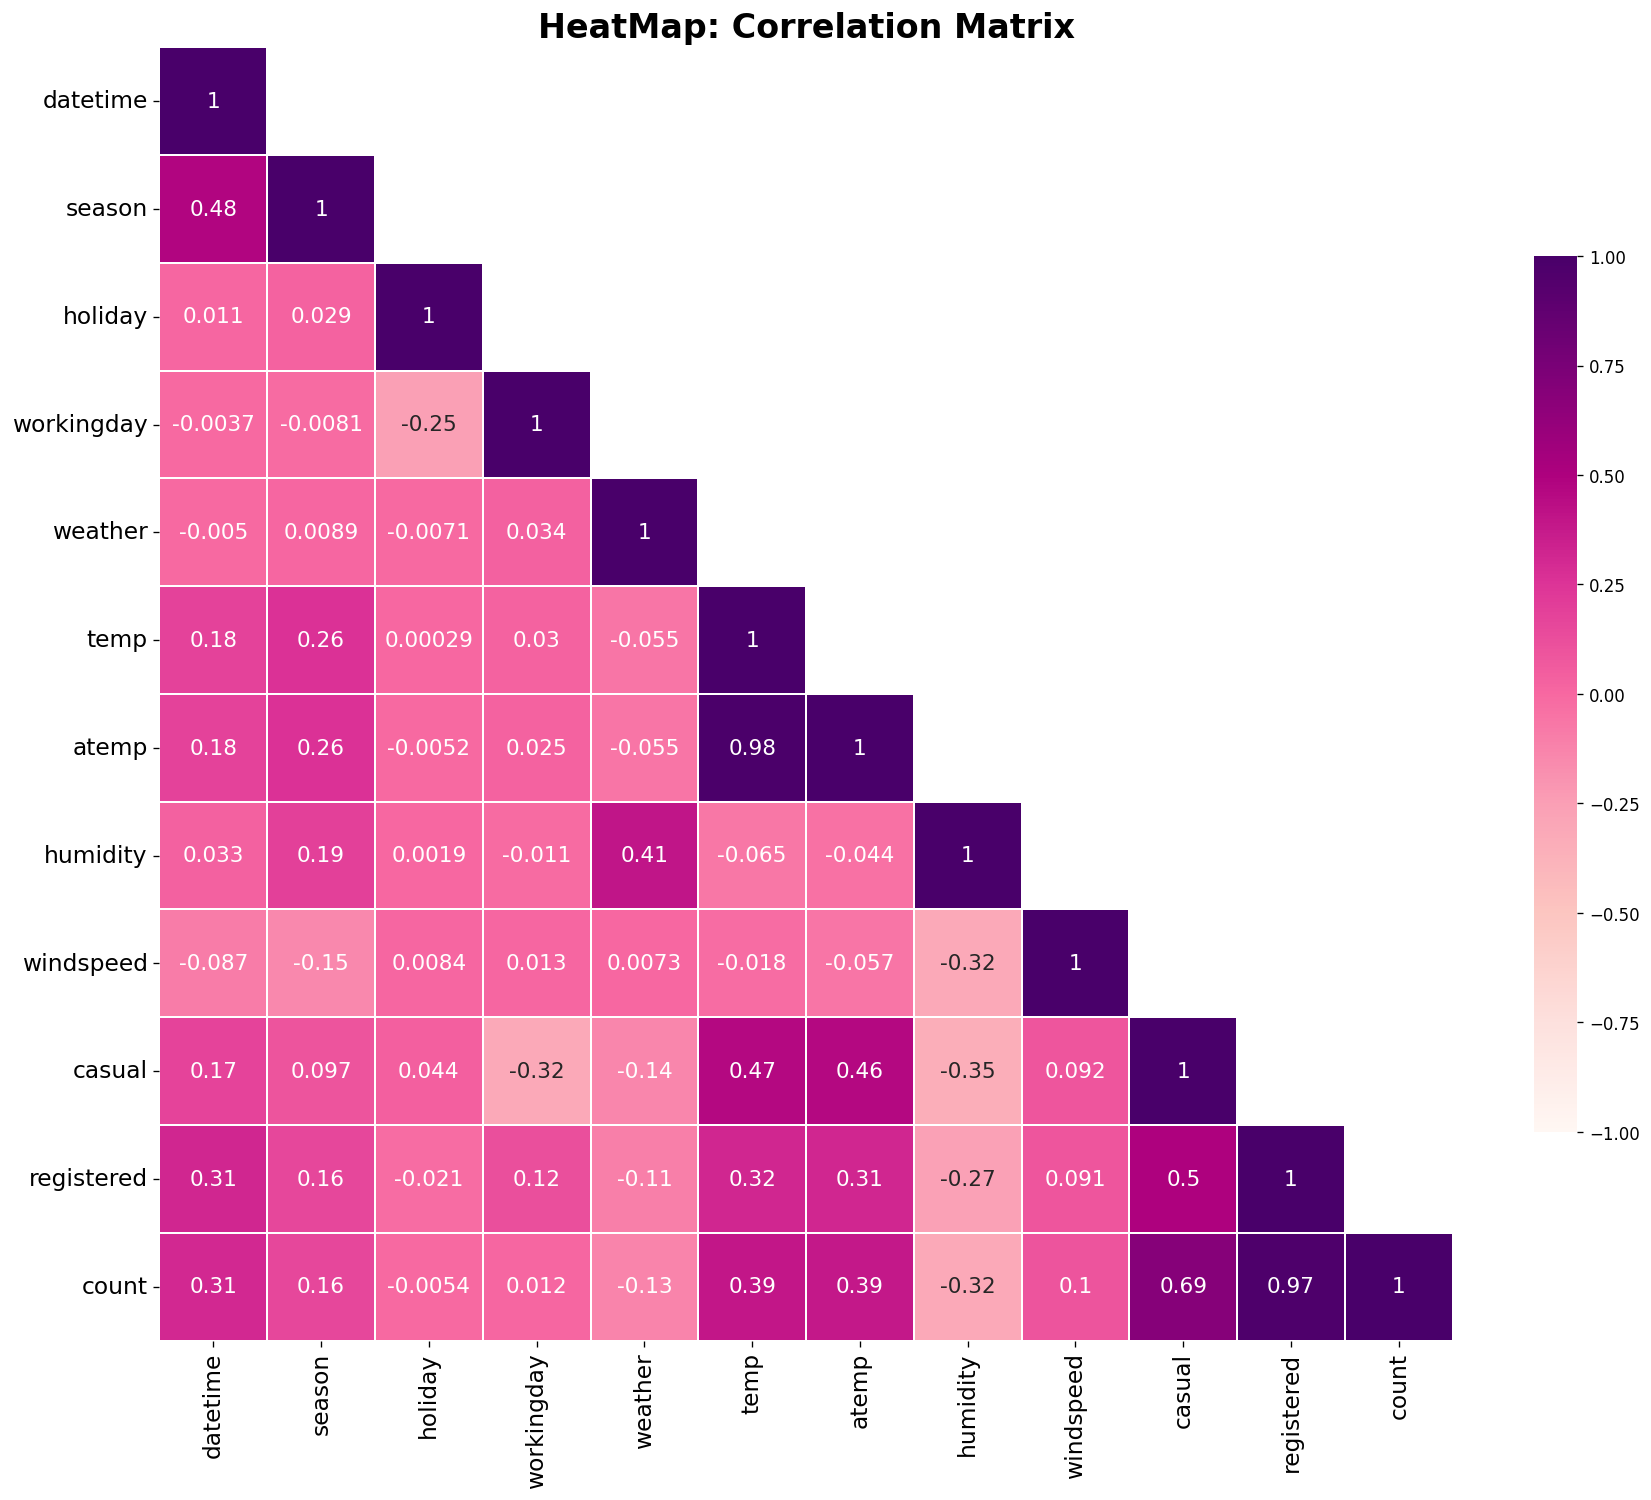

In [36]:
## Let's check the correlation between these variables to see if there is pattern between variables

#Plotting a heatmap to understand the correlation between the independent variables
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize = (15,15), dpi=120)
corr_data = train.copy()

corr_matrix = corr_data.corr()
f, ax_corr1 = plt.subplots(figsize=(15, 15), dpi=120)
# Create a mask to eliminate redundant repetitive correlations
corr_mask = np.array(corr_matrix)
corr_mask[np.tril_indices_from(corr_mask)] = False

# Plot heatmap using correlation matrix and mask
ax_corr1 = sns.heatmap(corr_matrix, cmap= 'RdPu', cbar_kws={"shrink": .5}, vmin= -1, vmax=1, center=0,
            square=True, mask=corr_mask, annot=True, linewidths=0.01, annot_kws={"size":13})
plt.xticks(fontsize=14, rotation=90)
plt.yticks(fontsize=14, rotation=0)
plt.title("HeatMap: Correlation Matrix", fontsize=20, fontweight='bold')
plt.tight_layout()
plt.autoscale()
plt.show()

Observations:

Independent features temp (real-time temperature in Celsius) and atemp ('feels like' temperature in Celsius) are highly correlated with a positive correlation of 0.98; but these features also collectively affect the bike counts.

casual and registered are also highly correlated to the target variable count but they are ignored while training as these variables are absent in the test data.

Holiday and working day show least correlation with 'bike rental counts'
weather and humidity is slight negatively correlated with the decision of people deciding to take bike rentals and it intuitively makes sense.

**Creating New Features**

In [37]:
# Checking 'datetime' feature in train data
train['datetime'].head()

,datetime
0,2011-01-01 00:00:00
1,2011-01-01 01:00:00
2,2011-01-01 02:00:00
3,2011-01-01 03:00:00
4,2011-01-01 04:00:00


Observation:

Variation is seen on hourly basis. So splitting the 'datetime' feature into year, month, day (dayofweek) and hour respectively.

In [38]:
# Splitting the 'datetime' feature in train data
train["year"] = train["datetime"].dt.year
train["month"] = train["datetime"].dt.month
train["day"] = train["datetime"].dt.dayofweek  # Note: day -> dayofweek (0->Monday, 6->Sunday)
train["hour"] = train["datetime"].dt.hour
train.drop(["datetime"], axis=1, inplace=True)     # Drop 'datetime' feature
train.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour
0,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,5,0
1,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,5,1
2,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,5,2
3,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011,1,5,3
4,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011,1,5,4


In [39]:
# Splitting the 'datetime' feature in test data
test["year"] = test["datetime"].dt.year
test["month"] = test["datetime"].dt.month
test["day"] = test["datetime"].dt.dayofweek  # Note: day -> dayofweek (0->Monday, 6->Sunday)
test["hour"] = test["datetime"].dt.hour
test.drop(["datetime"], axis=1, inplace=True)   # Drop 'datetime' feature
test.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,year,month,day,hour
0,1,0,1,1,10.66,11.365,56,26.0027,2011,1,3,0
1,1,0,1,1,10.66,13.635,56,0.0000,2011,1,3,1
2,1,0,1,1,10.66,13.635,56,0.0000,2011,1,3,2
3,1,0,1,1,10.66,12.880,56,11.0014,2011,1,3,3
4,1,0,1,1,10.66,12.880,56,11.0014,2011,1,3,4


Make category types for these so models know they are not just numbers
AutoGluon originally sees these as ints, but in reality they are int representations of a category.

Setting the dtype to category will classify these as categories in AutoGluon.

In [40]:
# Recheck datatype of features in the train dataset
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      10886 non-null  int64  
 1   holiday     10886 non-null  int64  
 2   workingday  10886 non-null  int64  
 3   weather     10886 non-null  int64  
 4   temp        10886 non-null  float64
 5   atemp       10886 non-null  float64
 6   humidity    10886 non-null  int64  
 7   windspeed   10886 non-null  float64
 8   casual      10886 non-null  int64  
 9   registered  10886 non-null  int64  
 10  count       10886 non-null  int64  
 11  year        10886 non-null  int32  
 12  month       10886 non-null  int32  
 13  day         10886 non-null  int32  
 14  hour        10886 non-null  int32  
dtypes: float64(3), int32(4), int64(8)
memory usage: 1.1 MB


In [41]:
# Convert 'int' feature columns that are categorical in nature to 'category' type
train["season"] = train["season"].astype("category")
train["weather"] = train["weather"].astype("category")

test["season"] = test["season"].astype("category")
test["weather"] = test["weather"].astype("category")

In [42]:
# View the new features
train.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour
0,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,5,0
1,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,5,1
2,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,5,2
3,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011,1,5,3
4,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011,1,5,4


In [43]:
# Recheck datatypes
train.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   season      10886 non-null  category
 1   holiday     10886 non-null  int64   
 2   workingday  10886 non-null  int64   
 3   weather     10886 non-null  category
 4   temp        10886 non-null  float64 
 5   atemp       10886 non-null  float64 
 6   humidity    10886 non-null  int64   
 7   windspeed   10886 non-null  float64 
 8   casual      10886 non-null  int64   
 9   registered  10886 non-null  int64   
 10  count       10886 non-null  int64   
 11  year        10886 non-null  int32   
 12  month       10886 non-null  int32   
 13  day         10886 non-null  int32   
 14  hour        10886 non-null  int32   
dtypes: category(2), float64(3), int32(4), int64(6)
memory usage: 957.3 KB


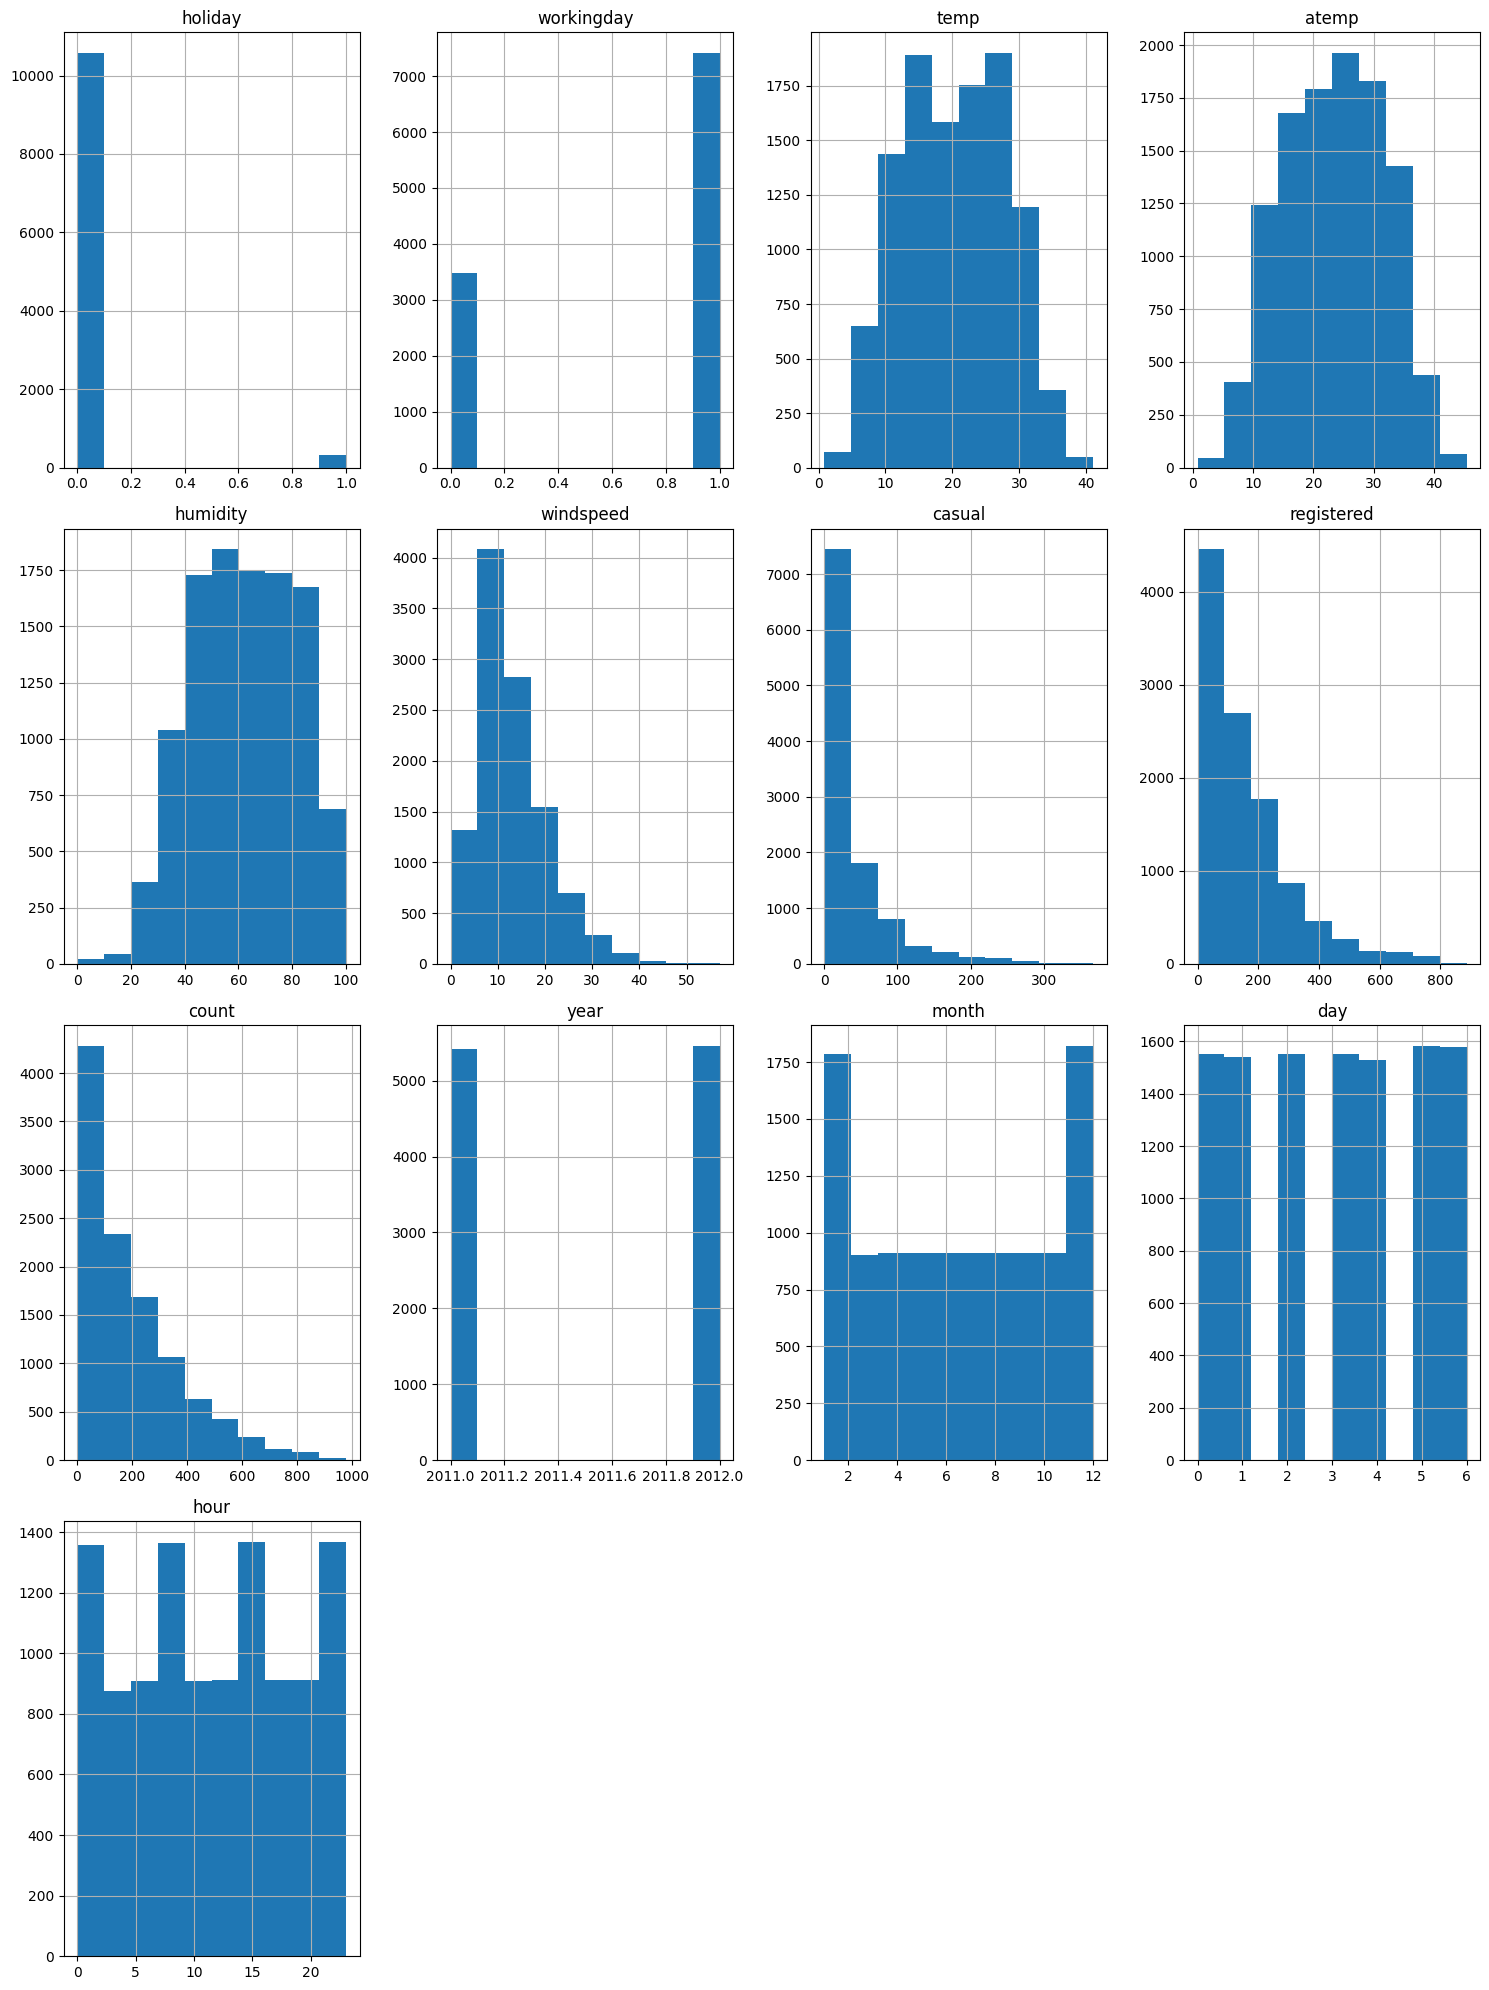

In [44]:
# View histogram of all features again now with the hour feature
train.hist(figsize=(15,20))  # Note: 'casual' and 'registered' are ignored during training as they are absent in test data

plt.tight_layout()
plt.show()

**Variation in target variable count with respect to new features derived from datetime feature**

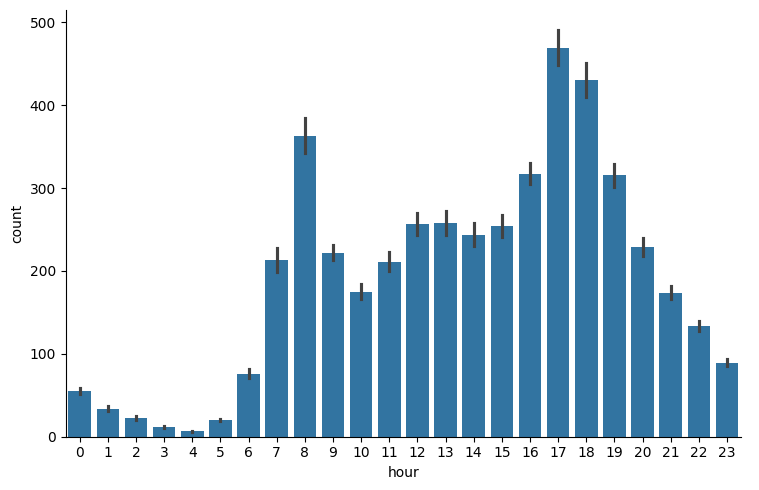

In [45]:
# Variation in`count` w.r.t `hour`

# Using catplot: 'kind':bar makes sure to take value of 'count' for every record into account
sns.catplot(x="hour",y="count",data=train,kind='bar',height=5,aspect=1.5)
plt.tight_layout()
plt.show()

Observations:

Frequency of Bike Rides (Hourly-basis):


High: From 7-9 (7am - 9am) and 16-19 (4pm - 7pm)

Moderate: 10-15 (10am - 3pm)

Low: 0-6 (12am - 6am) and 20-24 (8pm - 12am)

This makes sense as most people who rent these bikes could potentially be young college students or working professionals, who actively commute via some means of transport during peak hours of the day mentioned under the High category.

Since bike rental is one of the cheapest option, this could be the reason for the indicated surge in rental counts during peak hours of the day.

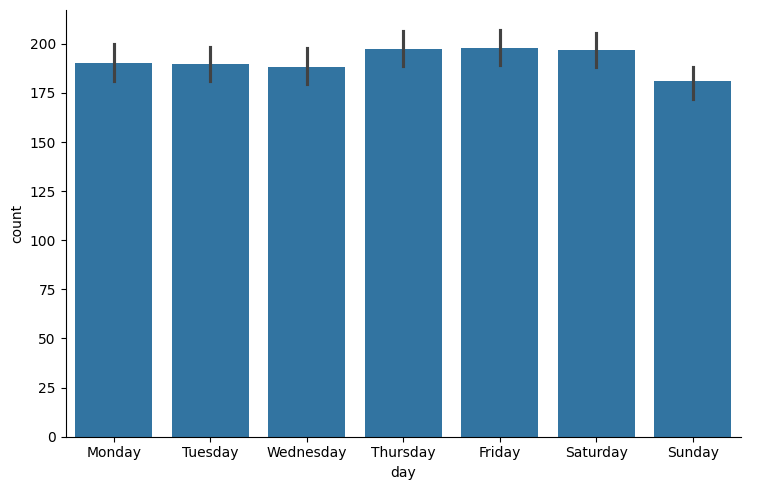

In [46]:
# Variation in`count` w.r.t `day` (dayofweek) [0: Monday -> 6: Sunday]

# Using catplot: 'kind':bar makes sure to take value of 'count' for every record into account
sns.catplot(x="day",y="count",data=train,kind='bar',height=5,aspect=1.5)
plt.tight_layout()
plt.xticks(ticks=range(0,7), labels=["Monday", "Tuesday", "Wednesday",
                                     "Thursday", "Friday", "Saturday", "Sunday"])
plt.show()


**Observation:**

Not much variation or pattern is seen in the bike rental counts with respect to featureday.

However, the demand for bike rentals seem to be slightly more on Thursdays, Fridays and Saturdays

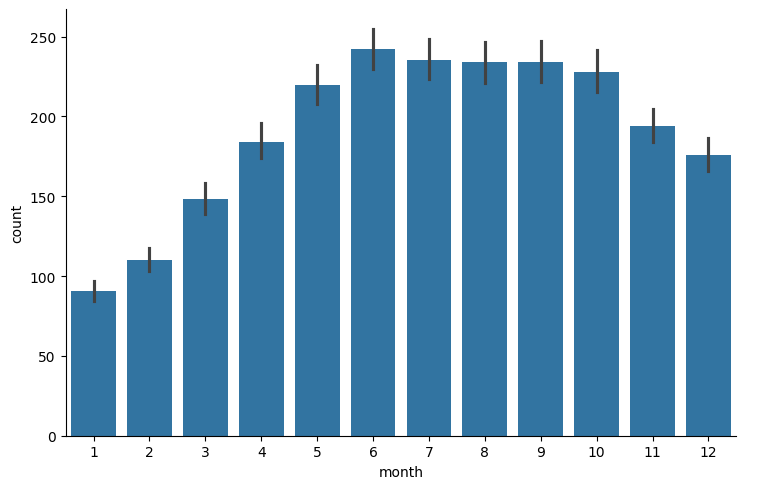

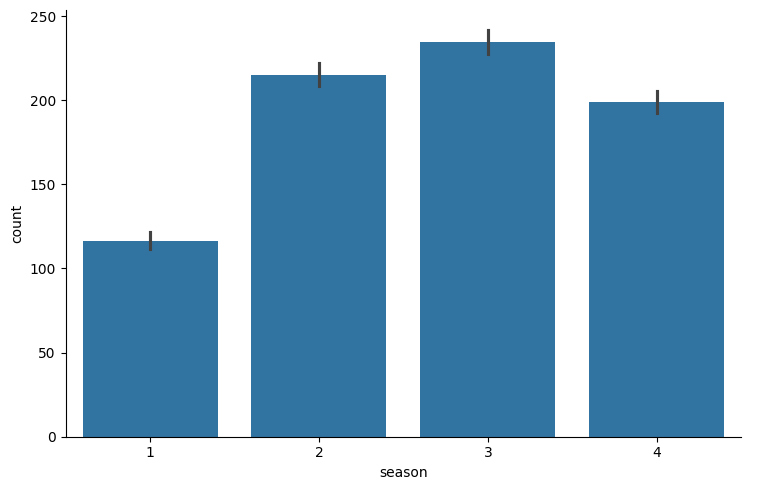

In [47]:
# Variation in`count` w.r.t `month` and 'season'

# Using catplot: 'kind':bar makes sure to take value of 'count' for every record into account
sns.catplot(x="month",y="count",data=train,kind='bar',height=5,aspect=1.5)
sns.catplot(x="season",y="count",data=train,kind='bar',height=5,aspect=1.5)
plt.tight_layout()
plt.show()

**Observation:**

Since seasons show variation in the number of bike rentals count, it is obvious to notice the same from the month feature, but at a slightly more granular level.

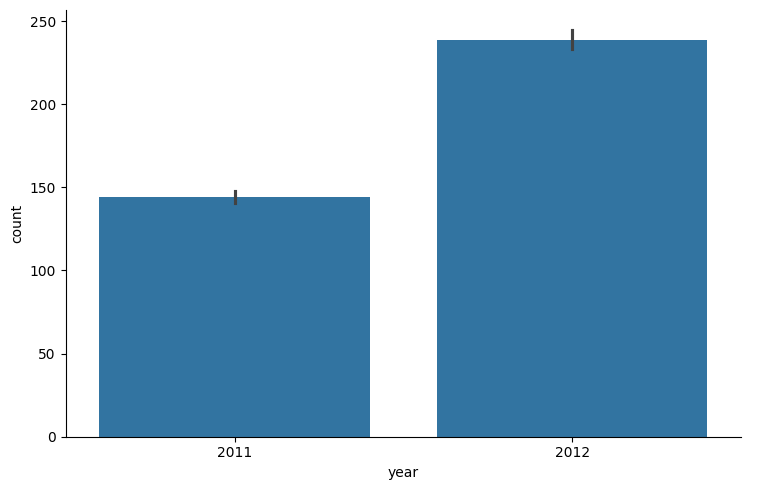

In [48]:
# Variation in`count` w.r.t `year`

# Using catplot: 'kind':bar makes sure to take value of 'count' for every record into account
sns.catplot(x="year",y="count",data=train,kind='bar',height=5,aspect=1.5)
plt.tight_layout()
plt.show()

**Observation:**

Year 2012 has higher bike demand as compared to 2011.

Changes in bike rental count with respect to cateogrical feature weather

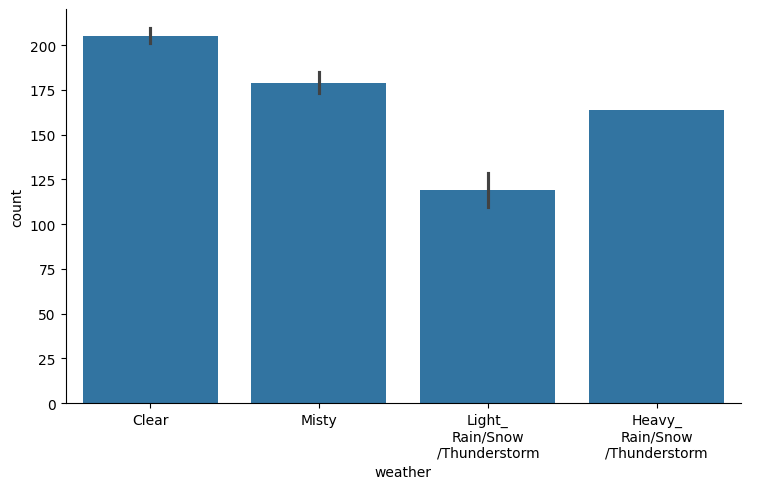

In [49]:
# Variation in`count` w.r.t `weather'

# Using catplot: 'kind':bar makes sure to take value of 'count' for every record into account
sns.catplot(x="weather",y="count",data=train,kind='bar',height=5,aspect=1.5)
plt.xticks(ticks=range(0,4), labels=["Clear","Misty",
                                     "Light_\nRain/Snow\n/Thunderstorm",
                                     "Heavy_\nRain/Snow\n/Thunderstorm"])
plt.tight_layout()
plt.show()

**Observation:**

Bike rental counts are highest in Clear weather, followed by Misty weather.

Creating a new feature 'day_type'

We know that in the given data,

holiday - whether the day is considered a holiday (0: Non-holiday, 1: Holiday)

workingday - whether the day is neither a weekend nor holiday (0: Can-be-a-weekend-or-holiday, 1: No-weekend-No-holiday)

In [50]:
# New feature 'day_type' contains categories 'weekend', 'weekday', or 'holiday' (In Train and Test set)

# Adding features - 'day_type' in train data
train["day_type"]=""
train.loc[(train.holiday==1),"day_type"] = "holiday"
train.loc[((train.holiday==0) & (train.workingday==1)), "day_type"] = "weekday"
train.loc[((train.holiday==0) & (train.workingday==0)), "day_type"] = "weekend"

# Adding features - 'day_type' in test data
test["day_type"]=""
test.loc[(test.holiday==1),"day_type"] = "holiday"
test.loc[((test.holiday==0) & (test.workingday==1)), "day_type"] = "weekday"
test.loc[((test.holiday==0) & (test.workingday==0)), "day_type"] = "weekend"

# Change the datatype to category
train["day_type"] = train["day_type"].astype("category")
test["day_type"] = test["day_type"].astype("category")

train.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,day_type
0,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,5,0,weekend
1,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,5,1,weekend
2,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,5,2,weekend
3,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011,1,5,3,weekend
4,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011,1,5,4,weekend


**Observation:**

New categorical feature day_type added with the following categories.

'holiday': when holiday is set to 1

'weekday': when holiday is set to 0 and workingday is set to 1

'weekend': when holiday is set to 0 and workingday is set to 0

In [51]:
# Statistics of all features within the trian data
train.describe()

,holiday,workingday,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour
count,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,0.028569,0.680875,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132,2011.501929,6.521495,3.013963,11.541613
std,0.166599,0.466159,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454,0.500019,3.444373,2.004585,6.915838
min,0.000000,0.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000,2011.000000,1.000000,0.000000,0.000000
25%,0.000000,0.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000,2011.000000,4.000000,1.000000,6.000000
50%,0.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000,2012.000000,7.000000,3.000000,12.000000
75%,0.000000,1.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000,2012.000000,10.000000,5.000000,18.000000
max,1.000000,1.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000,2012.000000,12.000000,6.000000,23.000000


**Observations:**

All the other aforementioned features have similar nature in the plots
New feature year shows that the historical data is for years 2011 and 2012 respectively.

Historical data of all 12 months within a year is considered in this train dataset.

Days from (at the earliest - 1st) to (at the maximum - 19th) of every month are taken into account in the train dataset

Hourly information of all busy hours within 24 hours of a day is mentioned in this dataset

In [52]:
# Dropping highly correlated independent feature 'atemp' from train and test datasets
train.drop(["atemp"], axis=1, inplace=True)
test.drop(["atemp"], axis=1, inplace=True)

In [53]:
# Checking datatypes of variables
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   season      10886 non-null  category
 1   holiday     10886 non-null  int64   
 2   workingday  10886 non-null  int64   
 3   weather     10886 non-null  category
 4   temp        10886 non-null  float64 
 5   humidity    10886 non-null  int64   
 6   windspeed   10886 non-null  float64 
 7   casual      10886 non-null  int64   
 8   registered  10886 non-null  int64   
 9   count       10886 non-null  int64   
 10  year        10886 non-null  int32   
 11  month       10886 non-null  int32   
 12  day         10886 non-null  int32   
 13  hour        10886 non-null  int32   
 14  day_type    10886 non-null  category
dtypes: category(3), float64(2), int32(4), int64(6)
memory usage: 883.0 KB


In [54]:
print("(After EDA + Feature Engineering) Train Data Shape : ", train.shape)
print("(After EDA + Feature Engineering) Test Data Shape  : ", test.shape)

(After EDA + Feature Engineering) Train Data Shape :  (10886, 15)
(After EDA + Feature Engineering) Test Data Shape  :  (6493, 12)


Step 5:

Rerun the model with the same settings as before, just with more features

In [56]:
# Requirements: (Same settings as that of initial run) For AutoGluon's Tabular Predictions
eval_metric = 'root_mean_squared_error'
label = 'count'
ignored_columns = ["casual", "registered"]   # Ignored columns while training
train_data = train                           # 'casual' and 'registered' columns are already dropped/ignored
time_limit = 600                             # 10 minutes -> 60*10 = 600 seconds
presets = "best_quality"                     # auto_stack=True

In [57]:
predictor_new_features = TabularPredictor(label=label,
                                          problem_type= 'regression',
                                          eval_metric=eval_metric,
                                          learner_kwargs={'ignored_columns': ignored_columns}).fit(
                                                                                           train_data = train_data,
                                                                                           time_limit=time_limit,
                                                                                           presets=presets)

No path specified. Models will be saved in: "AutogluonModels/ag-20250608_083532"
Verbosity: 2 (Standard Logging)
=================== System Info ===================
AutoGluon Version:  1.3.1
Python Version:     3.11.13
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP PREEMPT_DYNAMIC Sun Mar 30 16:01:29 UTC 2025
CPU Count:          2
Memory Avail:       10.47 GB / 12.67 GB (82.6%)
Disk Space Avail:   64.35 GB / 107.72 GB (59.7%)
Presets specified: ['best_quality']
Setting dynamic_stacking from 'auto' to True. Reason: Enable dynamic_stacking when use_bag_holdout is disabled. (use_bag_holdout=False)
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=1
DyStack is enabled (dynamic_stacking=True). AutoGluon will try to determine whether the input data is affected by stacked overfitting and enable or disable stacking as a consequence.
	This is used to identify the optimal `num_stack_levels` value. Copies of AutoGluon will be

In [58]:
predictor_new_features = TabularPredictor.load("AutogluonModels/ag-20250608_083532")

In [59]:
# Leaderboard dataframe
leaderboard_new_features_df = pd.DataFrame(predictor_new_features.leaderboard(silent=True))
leaderboard_new_features_df

,model,score_val,eval_metric,pred_time_val,fit_time,pred_time_val_marginal,fit_time_marginal,stack_level,can_infer,fit_order
0,WeightedEnsemble_L3,-34.400713,root_mean_squared_error,40.969324,308.741370,0.000944,0.036799,3,True,10
1,WeightedEnsemble_L2,-34.454222,root_mean_squared_error,39.358446,220.844916,0.001623,0.197460,2,True,6
2,LightGBM_BAG_L2,-35.070184,root_mean_squared_error,40.141090,264.167753,0.291821,43.423310,2,True,8
3,RandomForestMSE_BAG_L2,-35.549448,root_mean_squared_error,40.676559,265.281261,0.827290,44.536819,2,True,9
4,LightGBMXT_BAG_L2,-35.575671,root_mean_squared_error,40.302930,268.017243,0.453662,47.272800,2,True,7
5,LightGBM_BAG_L1,-35.780355,root_mean_squared_error,5.470520,72.733524,5.470520,72.733524,1,True,4
6,LightGBMXT_BAG_L1,-36.708020,root_mean_squared_error,33.184652,130.717556,33.184652,130.717556,1,True,3
7,RandomForestMSE_BAG_L1,-39.717239,root_mean_squared_error,0.701652,17.196375,0.701652,17.196375,1,True,5
8,KNeighborsDist_BAG_L1,-109.845172,root_mean_squared_error,0.242938,0.057129,0.242938,0.057129,1,True,2
9,KNeighborsUnif_BAG_L1,-113.261643,root_mean_squared_error,0.249507,0.039858,0.249507,0.039858,1,True,1


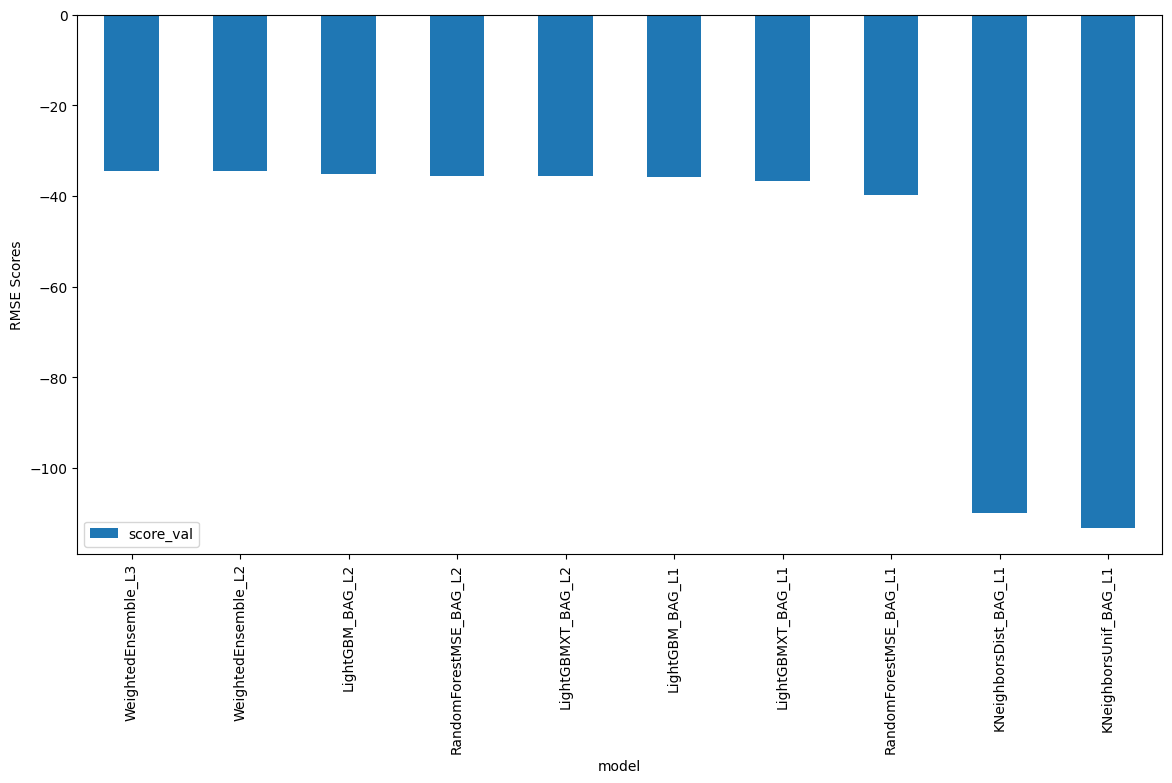

In [60]:
# Output the model's `score_val` in a bar chart to compare performance
import matplotlib.pyplot as plt
leaderboard_new_features_df.plot(kind="bar", x="model", y="score_val", figsize=(14, 7))
plt.ylabel("RMSE Scores")
plt.show()


Create predictions from test dataset

In [61]:
predictions_new_features = predictor_new_features.predict(test)
predictions_new_features.head()

,count
0,14.784871
1,5.353655
2,3.992665
3,3.092141
4,3.019995


In [62]:
# Describe the `predictions_new_features` series to see if there are any negative values
predictions_new_features.describe()

,count
count,6493.000000
mean,190.413681
std,174.411606
min,-14.432007
25%,45.749779
50%,148.783630
75%,282.664490
max,922.964355


**Observations:**

Since the minimum value in predictions series is 1.654, we can safely say that there are no negative values in the predictions.

In [63]:
# How many negative values do we have?

# Rechecking the predictions in predictions_new_features
negative_pred_count = predictions_new_features.apply(lambda x: 1 if x<0 else 0)

pred_pos_count = (negative_pred_count==0).sum()
pred_neg_count = (negative_pred_count==1).sum()

print("Total predictions                :", len(predictions_new_features.index))
print("Total positive prediction values :", pred_pos_count)
print("Total negative prediction values :", pred_neg_count)

Total predictions                : 6493
Total positive prediction values : 6451
Total negative prediction values : 42


In [64]:
# Remember to set all negative values to zero
predictions_new_features[predictions_new_features<0] = 0    # (In case, if negative values exist in the predictions_new_features, set them to 0)

# Rechecking, if no predictions are less than 0
negative_pred_count = predictions_new_features.apply(lambda x: 1 if x<0 else 0)
pred_neg_count = (negative_pred_count==1).sum()
print(f"No. of negative predictions: {pred_neg_count}")
print("All negative values in the predictions (if any) are set to zero successfully.")

No. of negative predictions: 0
All negative values in the predictions (if any) are set to zero successfully.


Set predictions to submission dataframe, save, and submit

In [65]:
# Same thing as train and test dataset
submission_new_features = pd.read_csv('sampleSubmission.csv', parse_dates = ['datetime'])
submission_new_features.head()

,datetime,count
0,2011-01-20 00:00:00,0
1,2011-01-20 01:00:00,0
2,2011-01-20 02:00:00,0
3,2011-01-20 03:00:00,0
4,2011-01-20 04:00:00,0


In [66]:
# Same submitting predictions
submission_new_features["count"] = predictions_new_features
submission_new_features.to_csv("submission_new_features.csv", index=False)

In [67]:
!kaggle competitions submit -c bike-sharing-demand -f submission_new_features.csv -m "new features"

100% 188k/188k [00:00<00:00, 1.08MB/s]
Successfully submitted to Bike Sharing Demand

In [68]:
!kaggle competitions submissions -c bike-sharing-demand | tail -n +1 | head -n 4

fileName                     date                        description           status                     publicScore  privateScore  
---------------------------  --------------------------  --------------------  -------------------------  -----------  ------------  
submission_new_features.csv  2025-06-08 08:51:36.823000  new features          SubmissionStatus.COMPLETE  0.49491      0.49491       
submission.csv               2025-06-08 08:17:42.100000  first raw submission  SubmissionStatus.COMPLETE  1.84252      1.84252       


New Score of 0.49491

Step 6: Hyper parameter optimization

There are many options for hyper parameter optimization.
Options are to change the AutoGluon higher level parameters or the individual model hyperparameters.

The hyperparameters of the models themselves that are in AutoGluon. Those need the hyperparameter and hyperparameter_tune_kwargs arguments.

In [69]:
# Requirements: (Same settings as initial run) For AutoGluon's Tabular Predictions
eval_metric = 'root_mean_squared_error'
label = 'count'
ignored_columns = ["casual", "registered"]   # Ignored columns while training
train_data = train                           # 'casual' and 'registered' columns are already dropped/ignored
time_limit = 600                             # 10 minutes -> 60*10 = 600 seconds
presets = "optimize_for_deployment"